In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('D:/projects/machine_learning_india_ai_challenge-dataset/TRAIN.csv')

In [3]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284455 rows and 31 columns.


In [4]:
#peek at data
df.sample(5)

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5295,5295,1.952016,-0.299617,-1.691243,-0.003656,1.205309,1.432432,-0.144344,0.324422,0.640466,...,-0.199736,-0.239604,0.284864,-2.337548,-0.370100,0.467540,-0.002953,-0.088944,1.00,0
53759,53759,1.185242,-0.843390,-0.029453,-0.748595,-0.845635,-0.626135,-0.339324,-0.137171,-1.112892,...,0.308988,0.523012,-0.264649,0.050527,0.595368,-0.125482,-0.033341,0.016541,125.65,0
75128,75128,2.005701,0.533453,-2.405708,0.782427,0.797678,-1.144398,0.113017,-0.246996,1.689946,...,-0.025018,0.284261,-0.090083,-0.764863,0.209383,-0.127083,-0.015568,-0.013303,12.05,0
133600,133600,-0.568158,-0.269111,1.469814,-2.083874,-1.453609,-0.241262,-1.022367,0.542961,-2.592902,...,0.126552,0.522161,-0.097863,-0.004348,-0.257981,-0.164543,0.029082,0.048524,23.60,0
254625,254625,-1.114492,1.901519,0.871611,1.184060,0.301724,-0.574200,-1.287757,-2.465860,0.077593,...,-1.189034,0.702079,-0.757776,0.402023,-0.489955,-0.411958,0.038214,0.161257,1.50,0


In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284455 entries, 0 to 284454
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Index   284455 non-null  int64  
 1   V1      284455 non-null  float64
 2   V2      284455 non-null  float64
 3   V3      284455 non-null  float64
 4   V4      284455 non-null  float64
 5   V5      284455 non-null  float64
 6   V6      284455 non-null  float64
 7   V7      284455 non-null  float64
 8   V8      284455 non-null  float64
 9   V9      284455 non-null  float64
 10  V10     284455 non-null  float64
 11  V11     284455 non-null  float64
 12  V12     284455 non-null  float64
 13  V13     284455 non-null  float64
 14  V14     284455 non-null  float64
 15  V15     284455 non-null  float64
 16  V16     284455 non-null  float64
 17  V17     284455 non-null  float64
 18  V18     284455 non-null  float64
 19  V19     284455 non-null  float64
 20  V20     284455 non-null  float64
 21  V21     28

In [6]:
## numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, [ 'Amount']].describe()

,Amount
count,284455.000
mean,88.360
std,250.178
min,0.000
25%,5.600
50%,22.000
75%,77.200
max,25691.160


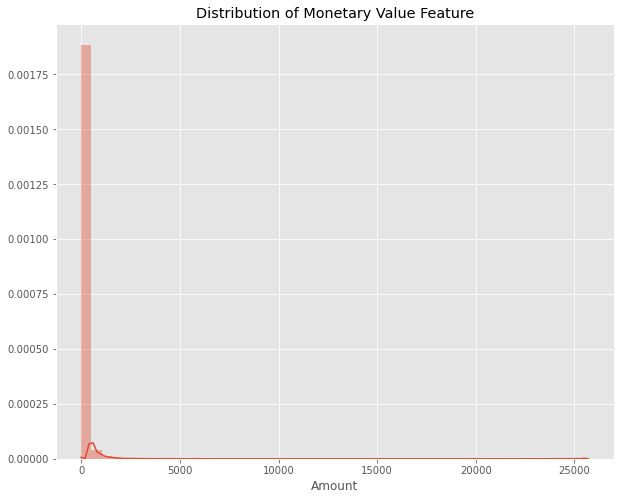

In [7]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [8]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284015 non-fraudulent transactions (99.845%) and 440 fraudulent transactions (0.155%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

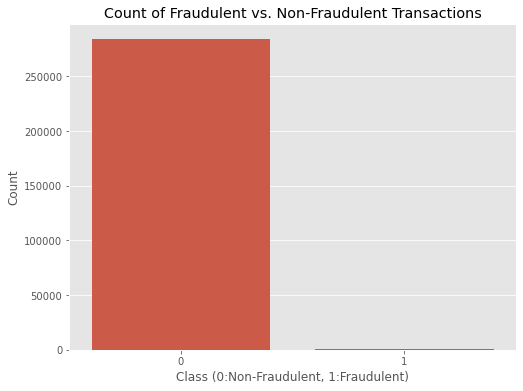

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [10]:
corr = df.corr()
corr

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Index,1.000e+00,-5.301e-04,-3.201e-03,1.798e-03,-1.309e-03,3.252e-03,9.803e-04,-6.448e-04,-1.832e-03,1.531e-03,...,-6.611e-04,-1.484e-03,-8.969e-04,-7.342e-04,-2.744e-03,4.123e-03,-3.340e-03,1.763e-03,-1.318e-04,-6.192e-04
V1,-5.301e-04,1.000e+00,2.475e-03,-4.452e-03,1.875e-03,-3.053e-03,-8.209e-04,-4.349e-03,1.714e-03,-1.686e-03,...,1.398e-03,-4.249e-04,-4.098e-05,-5.658e-05,4.736e-04,-8.833e-05,6.244e-04,4.956e-05,-2.281e-01,-9.637e-02
V2,-3.201e-03,2.475e-03,1.000e+00,3.680e-03,-1.928e-03,2.135e-03,7.293e-04,3.479e-03,-1.018e-03,1.442e-03,...,-1.457e-03,5.211e-04,-1.286e-04,1.154e-04,-4.554e-04,-3.319e-06,-7.492e-04,-1.337e-04,-5.319e-01,8.651e-02
V3,1.798e-03,-4.452e-03,3.680e-03,1.000e+00,3.698e-03,-4.458e-03,-1.599e-03,-7.041e-03,3.173e-03,-3.016e-03,...,2.047e-03,-4.453e-04,-1.827e-05,-2.790e-04,8.025e-04,2.351e-04,1.527e-03,1.832e-04,-2.117e-01,-1.832e-01
V4,-1.309e-03,1.875e-03,-1.928e-03,3.698e-03,1.000e+00,1.972e-03,8.891e-04,3.352e-03,-1.340e-03,1.905e-03,...,-9.769e-04,3.196e-04,-3.572e-05,3.139e-04,-4.047e-04,-2.261e-04,-6.552e-04,-8.570e-05,9.893e-02,1.274e-01
V5,3.252e-03,-3.053e-03,2.135e-03,-4.458e-03,1.972e-03,1.000e+00,-1.038e-03,-4.656e-03,2.383e-03,-1.656e-03,...,1.210e-03,-4.375e-04,-2.624e-04,4.668e-05,5.402e-04,-4.831e-05,7.686e-04,-7.462e-05,-3.870e-01,-8.930e-02
V6,9.803e-04,-8.209e-04,7.293e-04,-1.599e-03,8.891e-04,-1.038e-03,1.000e+00,-1.043e-03,1.295e-03,-6.994e-04,...,-1.387e-04,9.988e-05,-1.698e-04,1.370e-05,2.316e-04,6.852e-05,2.697e-04,1.208e-04,2.161e-01,-4.152e-02
V7,-6.448e-04,-4.349e-03,3.479e-03,-7.041e-03,3.352e-03,-4.656e-03,-1.043e-03,1.000e+00,1.795e-03,-2.781e-03,...,2.896e-03,-8.454e-04,3.038e-04,-1.349e-04,7.170e-04,1.170e-04,1.321e-03,2.009e-04,3.987e-01,-1.801e-01
V8,-1.832e-03,1.714e-03,-1.018e-03,3.173e-03,-1.340e-03,2.383e-03,1.295e-03,1.795e-03,1.000e+00,1.157e-03,...,2.831e-03,-9.323e-04,9.947e-04,-1.192e-04,-4.629e-04,-6.413e-06,-4.617e-04,1.756e-04,-1.034e-01,1.559e-02
V9,1.531e-03,-1.686e-03,1.442e-03,-3.016e-03,1.905e-03,-1.656e-03,-6.994e-04,-2.781e-03,1.157e-03,1.000e+00,...,5.369e-04,-1.027e-04,-7.135e-05,-5.554e-05,1.453e-04,1.247e-04,5.629e-04,6.119e-05,-4.428e-02,-9.359e-02


Text(0.5, 1.0, 'Heatmap of Correlation')

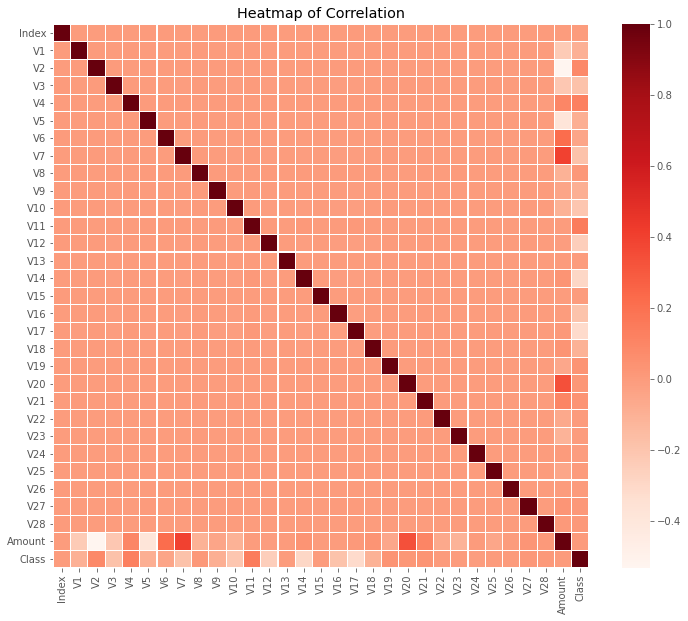

In [11]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr, linewidth=.1,cmap="Reds")
plt.title('Heatmap of Correlation')

In [12]:
#skewness
skew_ = df.skew()
skew_

Index    -1.790e-17
V1       -3.271e+00
V2       -4.650e+00
V3       -2.174e+00
V4        6.674e-01
V5       -2.409e+00
V6        1.828e+00
V7        2.663e+00
V8       -8.523e+00
V9        5.629e-01
V10       1.267e+00
V11       3.301e-01
V12      -2.183e+00
V13       6.522e-02
V14      -1.854e+00
V15      -3.085e-01
V16      -1.034e+00
V17      -3.564e+00
V18      -2.370e-01
V19       1.071e-01
V20      -2.039e+00
V21       3.445e+00
V22      -2.072e-01
V23      -5.879e+00
V24      -5.525e-01
V25      -4.158e-01
V26       5.767e-01
V27      -1.171e+00
V28       1.120e+01
Amount    1.698e+01
Class     2.537e+01
dtype: float64

**Scaling Amount**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()

In [17]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [18]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount')], axis=1)
df.sample(5)

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
192231,192231,-2.045,1.486,2.210,1.047,-1.097,-0.126,-0.262,0.286,0.422,...,0.276,-0.240,0.729,0.116,-0.440,-1.387e+00,-0.466,10.00,0,-0.313
227671,227671,0.166,0.138,-0.308,0.405,-0.650,0.673,1.717,-0.564,-1.944,...,0.064,0.083,0.803,-0.657,0.652,1.282e-04,-0.096,262.00,0,0.694
62524,62524,-0.626,0.974,0.611,-0.183,1.367,-0.004,0.766,0.095,-1.012,...,-0.915,-0.288,0.217,0.385,0.477,-1.045e-02,0.073,0.99,0,-0.349
228291,228291,1.256,0.348,0.304,0.695,-0.380,-1.075,0.081,-0.199,0.045,...,-0.837,0.130,0.343,0.213,0.095,-2.367e-02,0.031,1.98,0,-0.345
39559,39559,-0.575,0.660,1.669,0.119,-0.086,0.122,0.319,0.329,-0.006,...,0.487,-0.129,0.257,-0.292,0.365,3.657e-01,0.188,6.99,0,-0.325


In [19]:
#dropping old amount and time columns
df.drop(['Amount'], axis=1, inplace=True)

**Splitting Data into Train and Test**

In [20]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (255885, 31)
Test Shape: (28570, 31)


In [21]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [22]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 396 fraudulent transactions in the train data.


In [23]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [24]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
120825,134440,-0.706,0.638,1.294,0.129,0.691,-0.802,0.345,0.078,-0.435,...,-0.193,-0.563,0.097,0.035,-0.197,0.100,0.249,0.105,0,-0.342
105422,117336,1.870,-0.429,-0.529,1.140,-0.197,0.608,-0.701,0.289,0.946,...,0.274,0.860,0.047,0.274,0.003,-0.511,0.044,-0.036,0,-0.194
207202,230365,-2.024,1.012,1.415,0.847,-0.788,0.551,-0.678,1.282,-0.295,...,0.108,0.225,-0.218,-0.429,0.469,-0.419,0.288,-0.043,0,-0.173
108161,120417,-1.545,-0.327,-0.384,-2.159,1.590,3.954,-0.816,1.571,-0.985,...,-0.524,-1.204,0.179,0.641,-0.336,0.043,0.388,0.173,0,0.046
32526,36201,-1.808,-0.084,1.891,-0.054,-0.528,0.415,-0.315,0.801,-0.382,...,0.420,0.703,-0.051,-0.450,0.364,0.545,0.139,-0.031,0,0.261


In [25]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [26]:
subsample = pd.concat([selected, fraud])
len(subsample)

792

In [27]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,79225,1.256,0.308,0.290,0.699,-0.426,-1.085,0.044,-0.167,0.129,...,-0.295,-0.883,0.136,0.322,0.195,0.097,-0.027,0.029,0,-0.345
1,61055,-0.396,0.881,1.507,-0.222,0.584,-0.604,1.106,-0.550,-0.015,...,-0.017,0.383,-0.353,-0.075,-0.083,0.336,-0.141,-0.257,0,-0.341
2,238881,2.010,0.118,-1.605,0.334,0.436,-0.569,0.086,-0.087,0.189,...,-0.293,-0.759,0.353,0.616,-0.320,0.148,-0.062,-0.039,0,-0.345
3,267805,-1.610,1.369,-0.126,-0.462,-0.727,0.341,-0.975,1.529,0.513,...,0.329,0.661,-0.144,0.012,-0.121,-0.156,-0.209,0.027,0,-0.307
4,226807,-2.310,1.381,0.530,-0.380,-1.285,0.014,-0.724,1.461,0.304,...,0.095,0.002,-0.145,0.020,0.038,0.305,-0.587,-0.024,0,-0.191
5,34083,-3.054,1.554,-1.844,-0.022,0.088,-1.191,1.260,-0.622,2.827,...,-0.247,0.823,-0.475,-0.201,-0.363,-0.448,-1.926,-1.373,0,-0.054
6,225402,-0.140,1.496,-1.000,0.917,1.884,-0.270,1.459,-0.180,-0.741,...,-0.004,0.283,-0.332,-0.079,0.160,-0.366,0.448,0.279,0,-0.272
7,161605,-3.338,-0.783,-1.653,-0.839,0.305,3.681,-1.833,2.582,-1.334,...,-0.121,-0.587,0.096,0.987,-0.643,-0.701,-0.449,-0.455,0,-0.097
8,210690,1.272,0.097,-0.263,-0.228,0.174,-0.474,0.270,-0.155,-0.362,...,-0.427,-1.343,0.061,-0.497,0.197,0.654,-0.107,-0.010,0,-0.226
9,209668,-0.223,0.969,0.774,-0.162,0.135,-1.627,0.917,-0.397,1.209,...,-0.338,-0.561,0.283,0.869,-0.610,0.034,0.099,0.092,0,-0.346


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

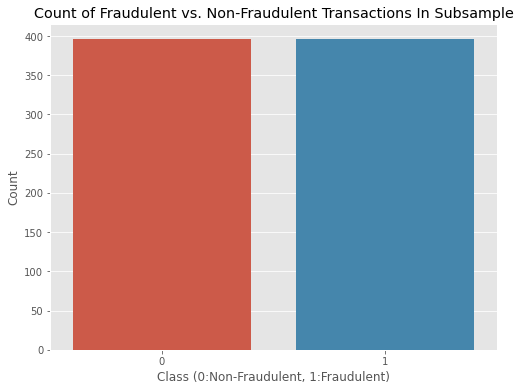

In [28]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [29]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
Index,0.010
V1,-0.425
V2,0.493
V3,-0.568
V4,0.716
V5,-0.392
V6,-0.410
V7,-0.486
V8,0.053
V9,-0.572


In [30]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.568
V9,-0.572
V10,-0.624
V12,-0.695
V14,-0.754
V16,-0.599
V17,-0.565


In [31]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.716
V11,0.688
Class,1.000


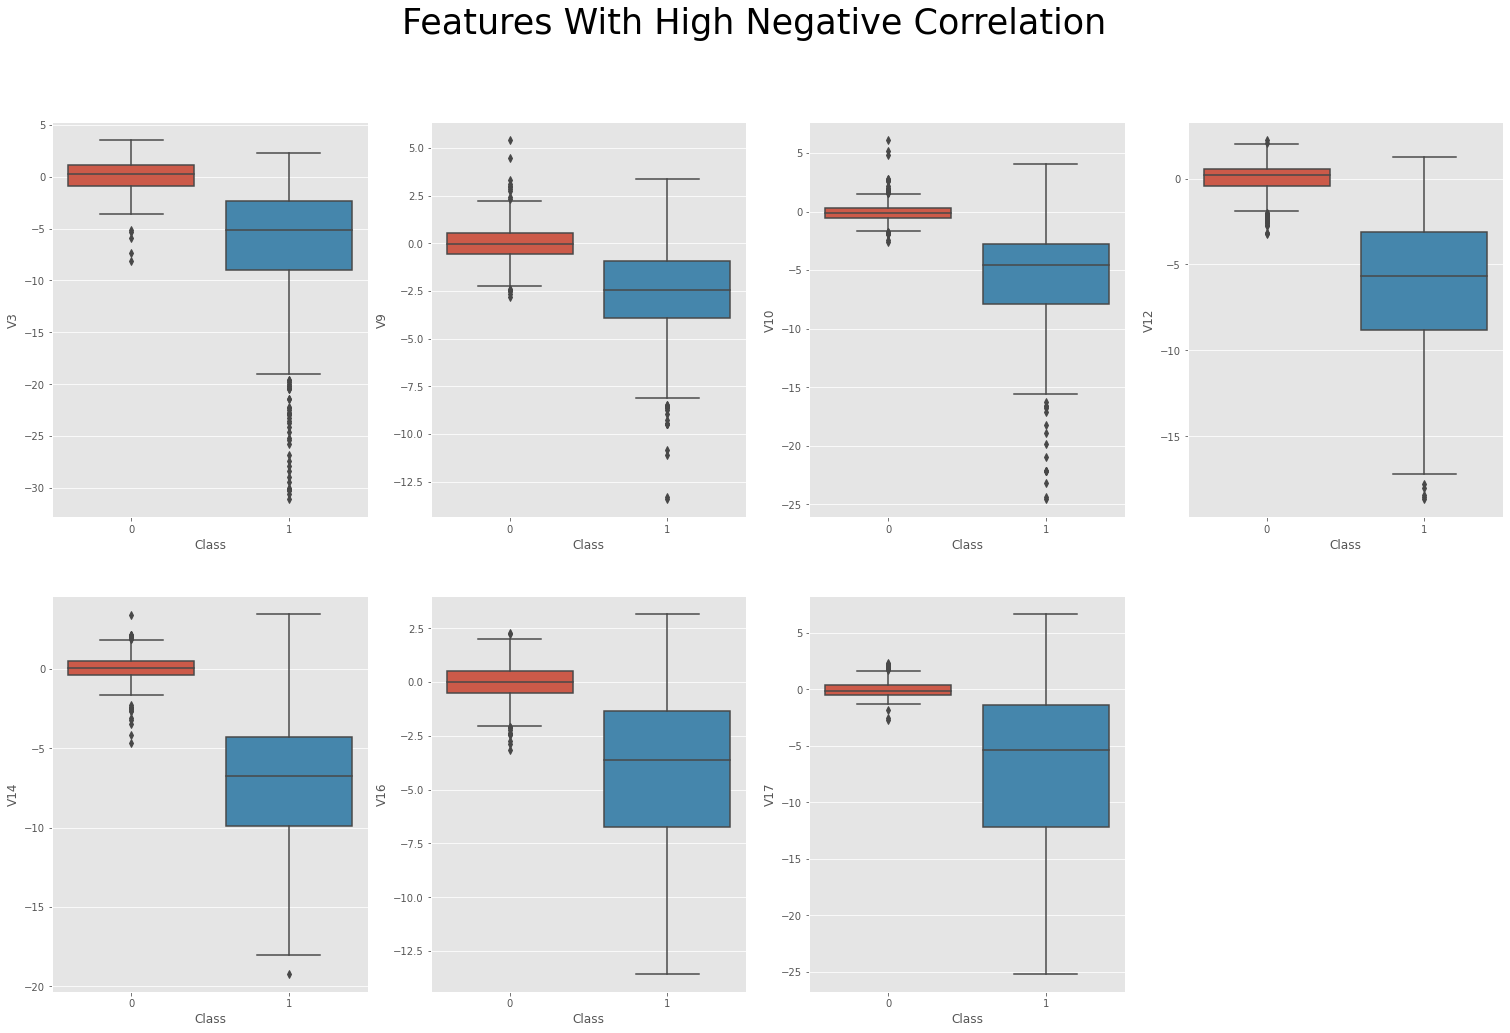

In [32]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

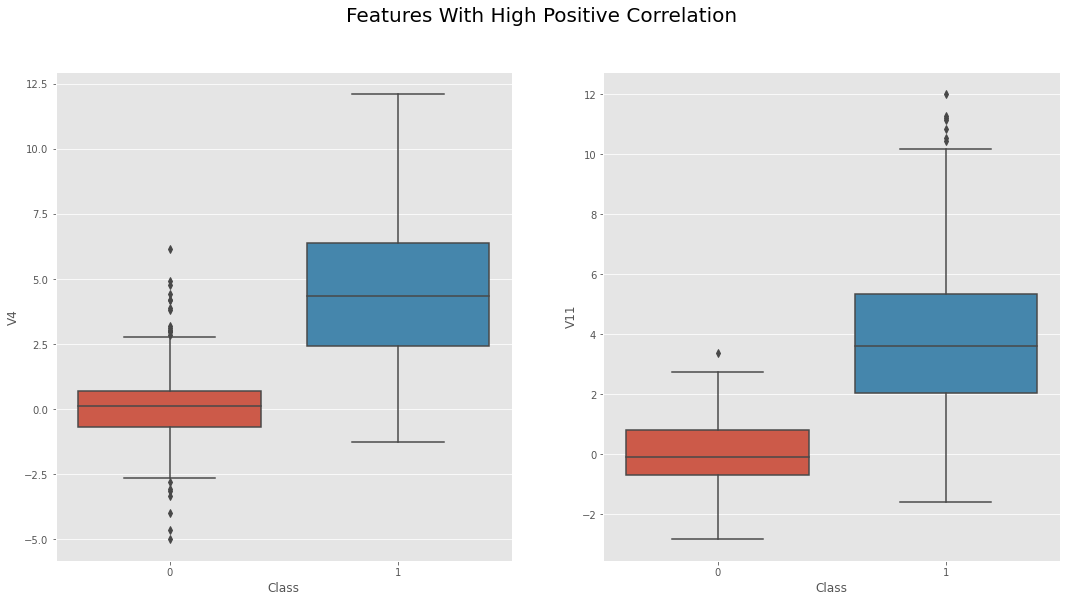

In [33]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [263]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.30)
Q3 = subsample.quantile(0.70)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 4.0 * IQR)) |(subsample > (Q3 + 4.0 * IQR))).any(axis=1)]

In [264]:
df2

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,79225,1.256,0.308,0.290,0.699,-0.426,-1.085,0.044,-0.167,0.129,...,-0.295,-0.883,0.136,0.322,0.195,0.097,-0.027,0.029,0,-0.345
1,61055,-0.396,0.881,1.507,-0.222,0.584,-0.604,1.106,-0.550,-0.015,...,-0.017,0.383,-0.353,-0.075,-0.083,0.336,-0.141,-0.257,0,-0.341
2,238881,2.010,0.118,-1.605,0.334,0.436,-0.569,0.086,-0.087,0.189,...,-0.293,-0.759,0.353,0.616,-0.320,0.148,-0.062,-0.039,0,-0.345
3,267805,-1.610,1.369,-0.126,-0.462,-0.727,0.341,-0.975,1.529,0.513,...,0.329,0.661,-0.144,0.012,-0.121,-0.156,-0.209,0.027,0,-0.307
4,226807,-2.310,1.381,0.530,-0.380,-1.285,0.014,-0.724,1.461,0.304,...,0.095,0.002,-0.145,0.020,0.038,0.305,-0.587,-0.024,0,-0.191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,75691,1.142,1.291,-1.433,2.058,0.941,-0.958,0.391,-0.093,-0.033,...,-0.367,-0.714,-0.144,-0.305,0.698,-0.313,0.106,0.125,1,-0.349
786,160336,-1.169,1.863,-2.515,5.464,-0.298,1.365,0.759,-0.119,-2.294,...,-0.393,-0.709,0.471,-0.079,-0.545,0.015,-0.241,-0.781,1,0.944
789,251647,1.100,0.182,0.399,1.473,-0.256,-0.592,0.320,-0.251,0.066,...,-0.079,-0.082,-0.160,0.444,0.766,-0.353,0.022,0.032,0,-0.093
790,76715,-1.331,1.434,0.850,-0.258,-0.228,-0.502,0.215,0.551,-0.393,...,-0.234,-0.596,0.104,-0.034,-0.029,0.091,0.365,0.165,0,-0.314


In [265]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 792 transactions by 193 transactions to 599 transactions.


**Dimensionality Reduction**

In [266]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [267]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

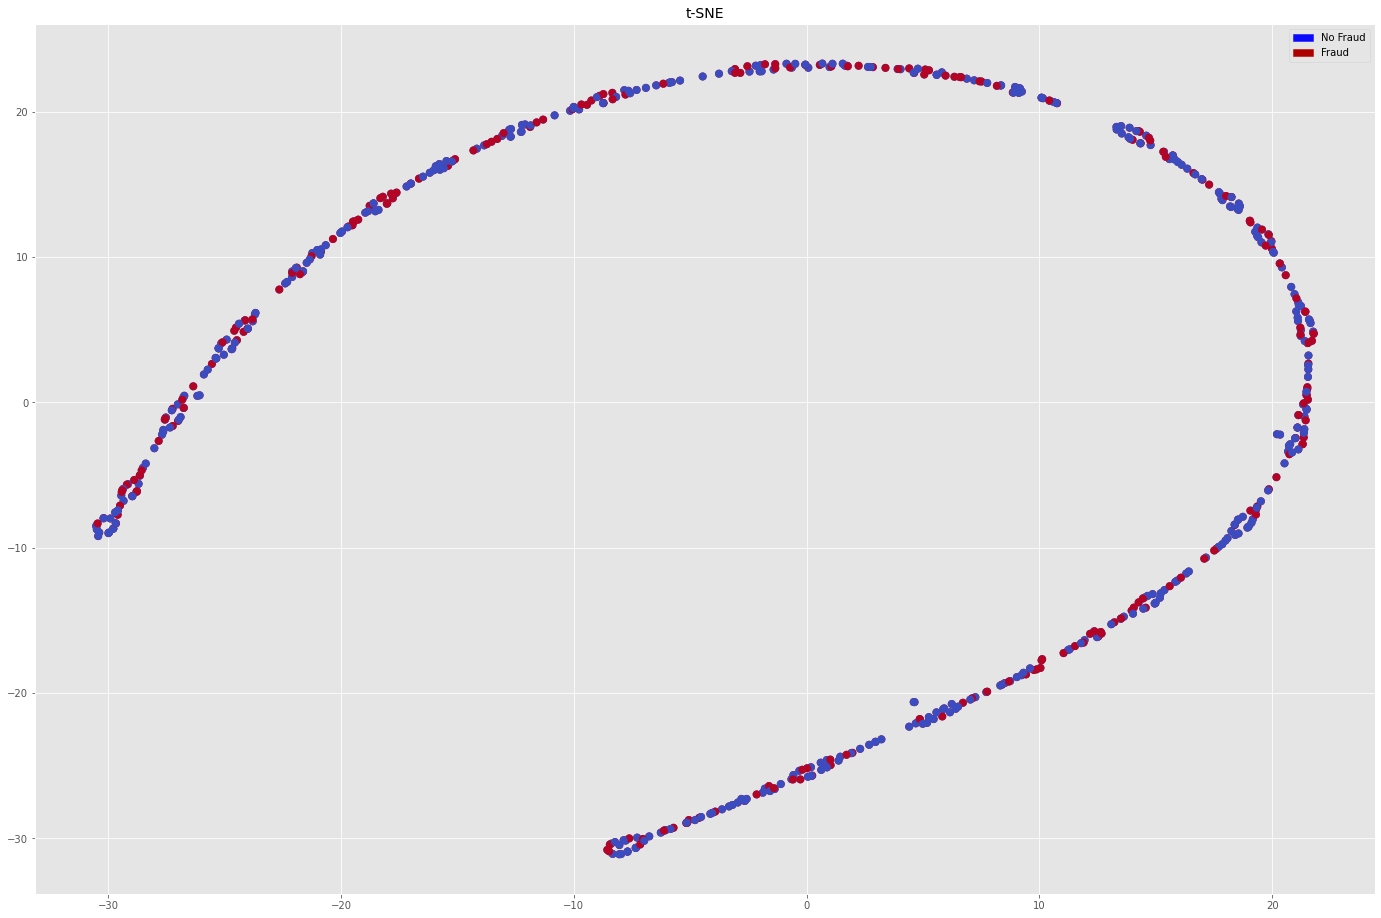

In [268]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


**Classification Algorithms**

In [269]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


In [270]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [271]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [272]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (479, 30) (120, 30) 

Y_shapes:
 Y_train: Y_validation:
 (479,) (120,)


In [273]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [274]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.952675 (0.026284)
LDA: 0.972276 (0.018046)
KNN: 0.525097 (0.061935)
CART: 0.861877 (0.071878)
SVM: 0.516123 (0.067706)
[19:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set 

In [275]:
test = pd.read_csv("D:/projects/machine_learning_india_ai_challenge-dataset/TEST.csv")

In [276]:
rfc = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_validation)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_validation,y_pred)
print(acc)
prediction = rfc.predict(test)

0.9666666666666667


In [219]:

prediction = pd.DataFrame(prediction, columns = [ "Class"])

In [220]:
prediction

,Class
0,0
1,0
2,0
3,1
4,0
...,...
347,1
348,0
349,0
350,0


In [200]:
prediction.to_csv("prediction.csv")